## Lecture 5: Fourier transform

In this demo we demonstrate the Fourier transform through a simple low-pass filter

In [1]:
# Importing packages
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
import skimage
import matplotlib
from skimage import io
from skimage import color
from matplotlib import cm
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)

### Example 1: The Fourier transform of an image

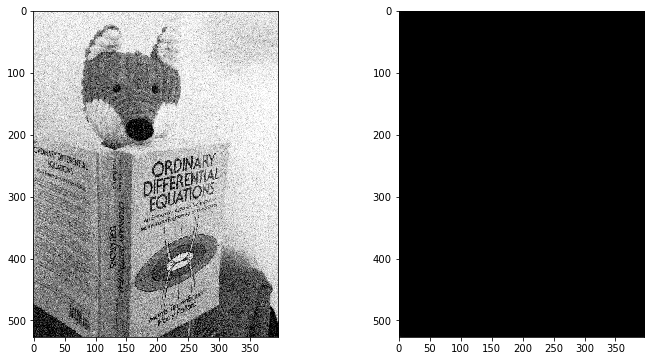

In [2]:
# Read image
f = np.array(color.rgb2gray(io.imread('noisy_smartgirl.png').astype(float)))

# Take Fourier transform
f_fft = fftpack.fft2(f)

# Verify that it is complex valued
#print(f_fft)

# Take magnitude of values of f_fft (giving the Fourier spectrum)
f_fft_abs = np.absolute(f_fft)

# View image and Fourier spectrum
fig, ax = plt.subplots(1,2)
ax[0].imshow(f, cmap=cm.Greys_r)
ax[1].imshow(f_fft_abs, cmap=cm.Greys_r)

What did we learn from that? Hmm...

The Fourier spectrum is on a scale that does not visualize well. Let's transform it to enhance contrast 
* The log transformed spectrum $100 \log ( 1 + |f\_fft|)$

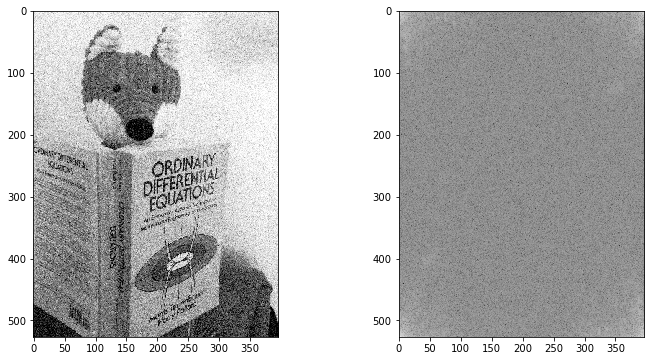

In [3]:
# The log-transformed spectrum:
f_logtrans = 100*np.log(1 + f_fft_abs)

# View image and the log transformed spectrum
fig, ax = plt.subplots(1,2)
ax[0].imshow(f, cmap=cm.Greys_r)
ax[1].imshow(f_logtrans, cmap=cm.Greys_r)

Now, the high frequencies are found at the boundaries. Let's shift them to the middle 

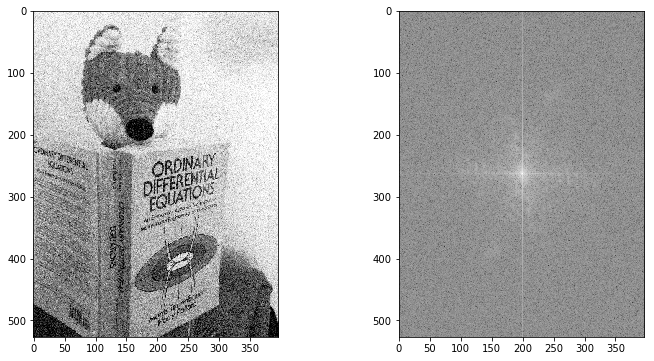

In [4]:
# Apply fftshift
f_logtrans_shifted = fftpack.fftshift(f_logtrans)

# View image, the power spectrum and the log transformed spectrum
fig, ax = plt.subplots(1,2)
ax[0].imshow(f, cmap=cm.Greys_r)
ax[1].imshow(f_logtrans_shifted, cmap=cm.Greys_r)

For the remainder of the lecture, let's collect those moves in a function

In [5]:
def log_spectrum(I):
    I_fft = fftpack.fft2(I)
    I_fftshifted = fftpack.fftshift(I_fft)
    return 100*np.log(1 + np.absolute(I_fftshifted))

### Example 2: Let's look at some toy images

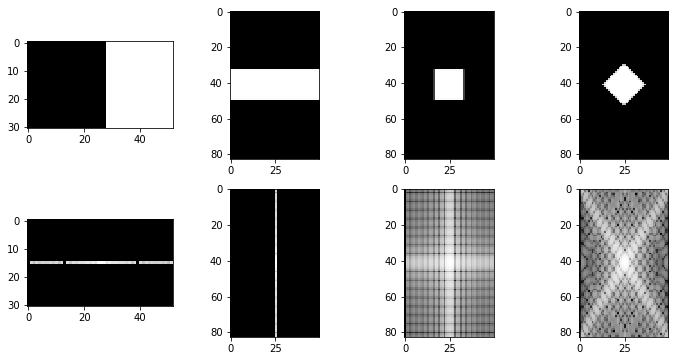

In [6]:
# Read and view test images
test1 = np.array(color.rgb2gray(io.imread('testim1.png').astype(float)))
test2 = np.array(color.rgb2gray(io.imread('testim2.png').astype(float)))
test3 = np.array(color.rgb2gray(io.imread('testim3.png').astype(float)))
test4 = np.array(color.rgb2gray(io.imread('testim4.png').astype(float)))

# View test images and their log transformed spectrums
fig, ax = plt.subplots(2,4)
ax[0,0].imshow(test1, cmap=cm.Greys_r)
ax[0,1].imshow(test2, cmap=cm.Greys_r)
ax[0,2].imshow(test3, cmap=cm.Greys_r)
ax[0,3].imshow(test4, cmap=cm.Greys_r)
ax[1,0].imshow(log_spectrum(test1), cmap=cm.Greys_r)
ax[1,1].imshow(log_spectrum(test2), cmap=cm.Greys_r)
ax[1,2].imshow(log_spectrum(test3), cmap=cm.Greys_r)
ax[1,3].imshow(log_spectrum(test4), cmap=cm.Greys_r)

### Example 3: A simple low-pass filter

Now, we are ready to filter out high frequency basis vectors by filtering in the Fourier domain

In [9]:
def lp_filter(f):
    rad = 50 # radius
    fil = np.zeros(f.shape)
    n, m = f.shape
    for i in range(n):
        for j in range(m):
            r = np.linalg.norm([i-n/2, j-m/2])
            if r < rad:
                fil[i,j] = 1
         
    # Comment out if you want to look at the filter
    io.imshow(fil, cmap=cm.Greys_r)
    
    # Take Fourier transform
    f_fft = fftpack.fft2(f)
    # Make fftshift
    f_fftshifted = fftpack.fftshift(f_fft)
    # Apply filter
    f_fftshifted_filtered = np.multiply(f_fftshifted, fil)
    # Make fftshift
    f_fft_filtered = fftpack.ifftshift(f_fftshifted_filtered)
    # Inverse Fourier transform
    f_filtered = fftpack.ifft2(f_fft_filtered)
    return f_filtered

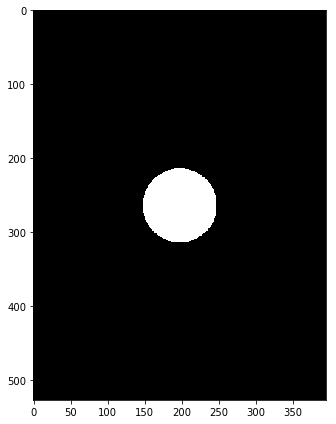

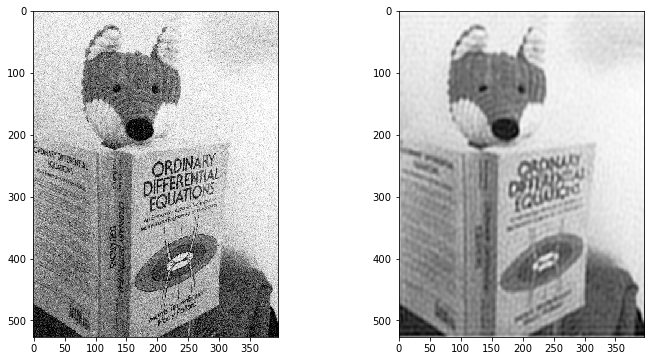

In [10]:
# Filter the image
f_filtered = lp_filter(f)

# View original image together with filtered version; make sure to take real part
fig, ax = plt.subplots(1,2)
ax[0].imshow(f, cmap=cm.Greys_r)
ax[1].imshow(np.real(f_filtered), cmap=cm.Greys_r)